PCA (Principal Component Analysis)?
PCA is a dimensionality reduction technique. It:

Reduces the number of features in your dataset.

Keeps only the most important information (principal components).

Speeds up model training and avoids overfitting.

When to use it?

When your dataset has many features (columns).

When features are correlated or redundant.

Before training a model like Logistic Regression, SVM, or even Neural Networks.



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Sample dataframe
df = pd.DataFrame({
    'age': [25, 32, 47],
    'sex': ['female', 'male', 'female'],
    'bmi': [22.0, 28.5, 31.2],
    'children': [0, 2, 3],
    'smoker': ['no', 'yes', 'no'],
    'region': ['southwest', 'southeast', 'northwest'],
    'charges': [16884.92, 1725.55, 4449.46]
})

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numerical and categorical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


In [4]:
df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\shaun\AppData\Local\Temp\ipykernel_15720\4082084960.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


In [5]:
from sklearn.decomposition import PCA

# Add PCA into a pipeline
pca_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('pca', PCA(n_components=2))  # choose 2 or any number of components
])

# Fit and transform
X_pca = pca_pipeline.fit_transform(X)

# Show shape
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (3, 6)
Reduced shape: (3, 2)


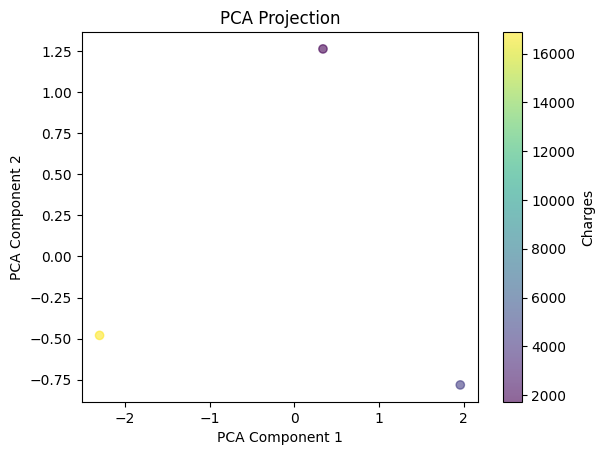

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection")
plt.colorbar(label='Charges')
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import numpy as np

print("RMSE after PCA:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE after PCA: 15443.465321593041
